# **Exploratory Data Analysis of Netflix Shows**

![](https://images.ctfassets.net/y2ske730sjqp/821Wg4N9hJD8vs5FBcCGg/9eaf66123397cc61be14e40174123c40/Vector__3_.svg?w=940)
## **Introduction**

Welcome to the exploratory data analysis (EDA) of Netflix shows! In this notebook, we will dive into the dataset containing information about various shows available on Netflix. By performing EDA, we aim to gain insights, discover patterns, and uncover interesting trends within the data.

Netflix has become one of the leading streaming platforms, offering a vast library of TV shows and movies across different genres. As a Netflix user or someone interested in the entertainment industry, this EDA will provide you with a better understanding of the shows available on the platform.

## **Data Loading and Preparation**

In this section, we will import the necessary libraries for data manipulation and visualization, load the dataset into a Pandas DataFrame, and perform initial data cleaning and preprocessing steps. The dataset used for this analysis is titled "*Netflix Shows*" 

### Import the required libraries for data manipulation and visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#style plotlib as seaborn style
plt.style.use('ggplot')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load the "Netflix Shows" dataset

In [2]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Data Cleaning

To calculate the total number of missing values in each column of the DataFrame, we can use the following code:

In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

To handle these missing values, the following plan will be implemented:

1. For the column '**director**', which has **2634** missing values, we will delete the entire column as it contains a significant number of missing values.

2. For the columns '**cast**', '**country**', '**date_added**', '**rating**', and '**duration**', which have **825**, **831**, **10**, **4**, and **3** missing values respectively, we will delete the rows that contain missing values in these columns. By removing these rows, we can ensure that the analysis is based on complete and reliable data.

#### Handling Missing Values
Removing Director column

In [5]:
df = df.drop(columns=['director'])
df.isna().sum()

show_id           0
type              0
title             0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

Removing rows with null values in Duration, Rating, Date Added, Country and Cast

In [6]:
df = df.dropna(axis=0, subset=['duration'])
df = df.dropna(axis=0, subset=['rating'])
df = df.dropna(axis=0, subset=['date_added'])
df = df.dropna(axis=0, subset=['country'])
df = df.dropna(axis=0, subset=['cast'])

df.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### Converting 'date_added' Column

To enhance the readability and consistency of the 'date_added' column in our dataset, we will be converting the existing format from "MMMM DD, YYYY" to the format of "YYYY-MM-DD". This change will allow for easier interpretation and standardize the date representation across the column.

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y').dt.strftime('%Y-%m-%d')
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


#### Handling Duration in Different Units for Correlation Analysis

To perform correlation analysis on the 'duration' column, which contains values in different units (seasons for TV shows and minutes for movies), we need to preprocess the data to ensure a unified format. 

In [8]:
df['duration'] = df['duration'].apply(lambda x: str(int(x.split()[0])*60*10) + ' min' if pd.notnull(x) and 'Season' in x else x)

df['duration'].head()

1    1200 min
4    1200 min
7     125 min
8    5400 min
9     104 min
Name: duration, dtype: object

## **Exploratory Data Analysis**



### Basic Data Exploration

Let's begin by exploring some basic information about the dataset:

#### Total number of rows and columns in the dataset

In [9]:
df.shape

(7290, 11)

In [10]:
df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
df.dtypes

show_id         object
type            object
title           object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

#### Summary statistics of numerical variables (e.g., release year)

In [12]:
df.describe()

,release_year
count,7290.000000
mean,2013.698903
std,8.862822
min,1942.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#### Count of unique values in categorical variables (e.g., type, country)

In [13]:
show_types_count = df['type'].value_counts()
countries_count = df['country'].value_counts()

print("Count of unique values in 'type' column:")
print(show_types_count)
print("\nCount of unique values in 'country' column:")
print(countries_count)

Count of unique values in 'type' column:
Movie      5277
TV Show    2013
Name: type, dtype: int64

Count of unique values in 'country' column:
United States                                2479
India                                         940
United Kingdom                                350
Japan                                         238
South Korea                                   196
                                             ... 
Uruguay, Argentina, Germany, Spain              1
Taiwan, Malaysia                                1
France, South Korea, Japan, United States       1
Kenya, United States                            1
United Arab Emirates, Jordan                    1
Name: country, Length: 689, dtype: int64


**In the dataset, some rows in the 'country' column contain multiple countries separated by commas. To ensure consistency and facilitate analysis, we will modify these rows to include only the first country from the list.**

In [14]:
for index, row in df.iterrows():
    countries = row['country'].split(',')[0]
    df.at[index, 'country'] = countries

### Data Visualization

Next, we'll use visualizations to understand the distribution and patterns in the data. Some visualizations we can consider include:

#### Histogram to visualize the distribution of release years or durations

<AxesSubplot: title={'center': 'release year'}, ylabel='Frequency'>

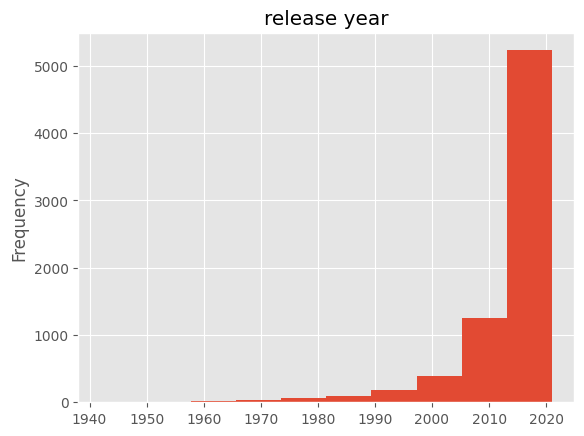

In [15]:
df['release_year'].plot(kind='hist', title='release year')

#### Pie charts to display the proportion of different show types (e.g., movies, TV shows)


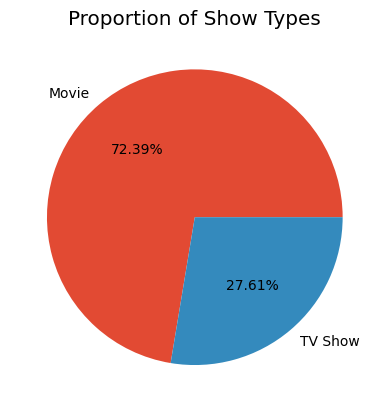

In [16]:
show_type_counts = df['type'].value_counts()

plt.pie(show_type_counts, labels=show_type_counts.index, autopct='%1.2f%%')
plt.title('Proportion of Show Types')
plt.show()

#### Heatmap to explore the top countries contributing to the Netflix shows

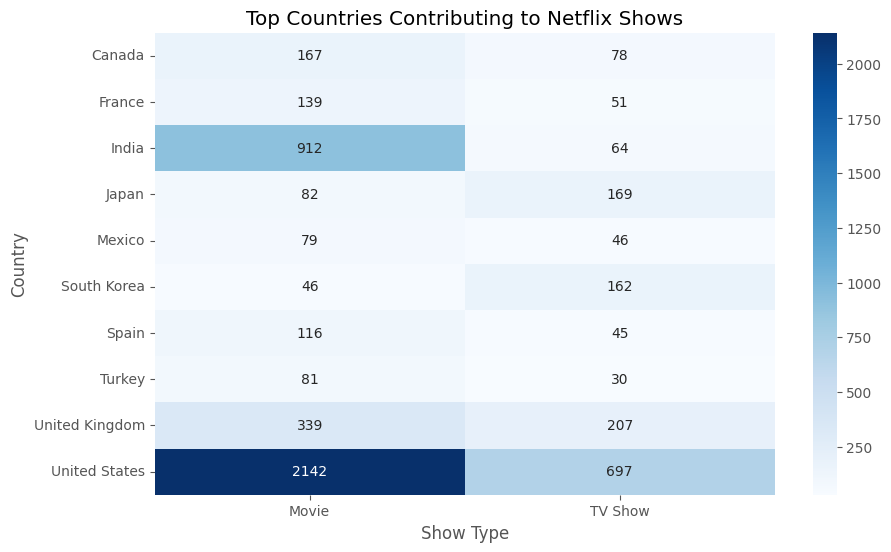

In [17]:
country_counts = df['country'].value_counts().head(10)
country_show_types = df[df['country'].isin(country_counts.index)].pivot_table(index='country', columns='type', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(country_show_types, cmap='Blues', annot=True, fmt='d', cbar=True)
plt.title('Top Countries Contributing to Netflix Shows')
plt.xlabel('Show Type')
plt.ylabel('Country')
plt.show()

#### Word cloud to visualize the most frequent words in the show titles

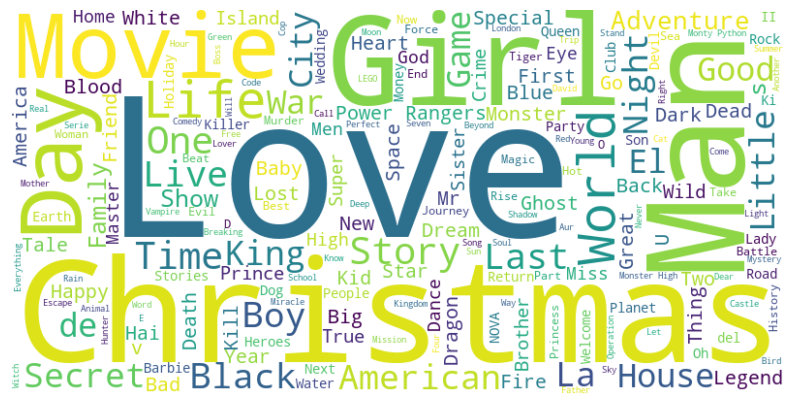

In [18]:
text = ' '.join(df['title'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Analysis of Relationships
We'll also explore relationships between different variables in the dataset.

#### Correlation analysis

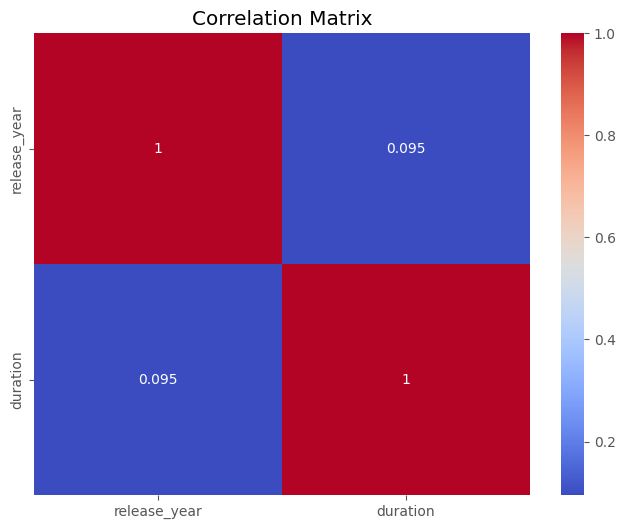

In [19]:
df['duration'] = df['duration'].astype(str)
df['duration'] = df['duration'].str.replace(' min', '')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
correlation_matrix = df[['release_year', 'duration']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Relationship between show types and countries

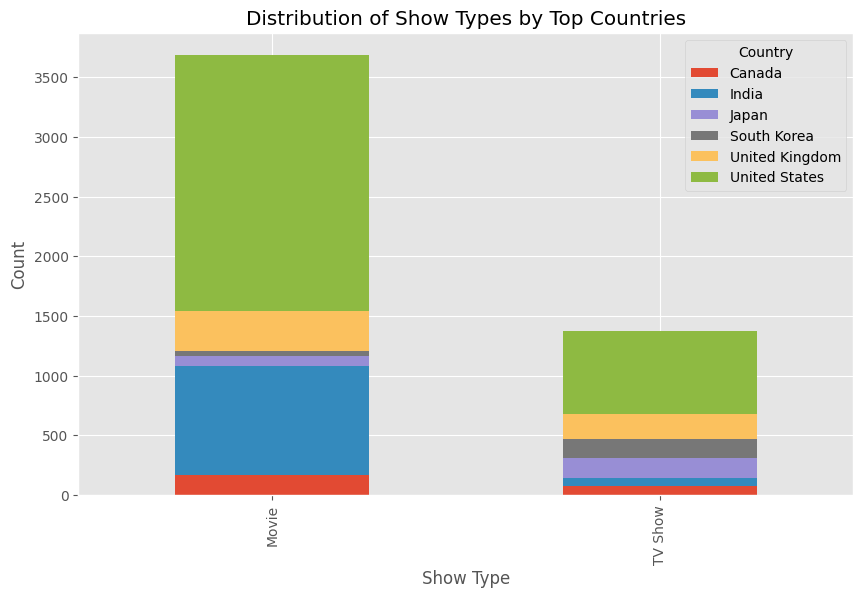

In [20]:
top_countries = df['country'].value_counts().nlargest(6).index
df_top_countries = df[df['country'].isin(top_countries)]
cross_tab = pd.crosstab(df_top_countries['type'], df_top_countries['country'])

cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Show Types by Top Countries')
plt.xlabel('Show Type')
plt.ylabel('Count')
plt.legend(title='Country')

plt.show()

## **Key Insights and Findings**

### Top 5 best categories

<AxesSubplot: title={'center': 'Top 5 best categories'}>

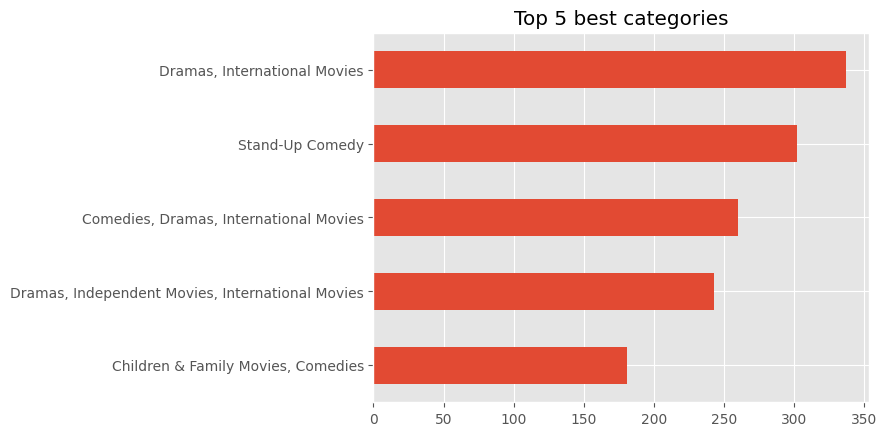

In [21]:
categories_count = df["listed_in"].value_counts()
categories_count.sort_values(ascending=True).tail(5).plot(kind='barh', title='Top 5 best categories')

### The ten best actors

<AxesSubplot: title={'center': 'The ten best actors'}>

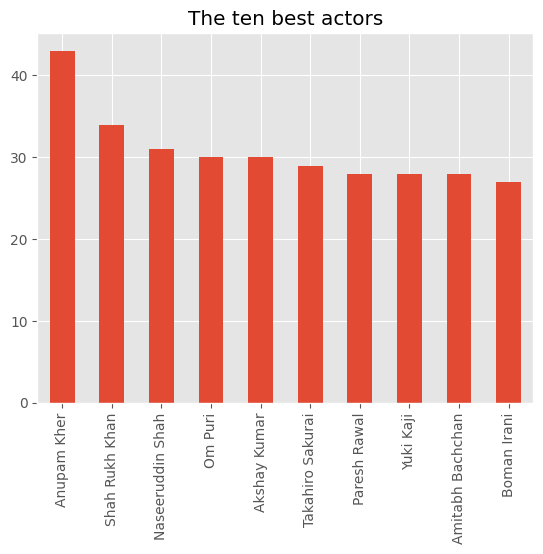

In [22]:
actors_count = df["cast"].str.split(",", expand=True).stack().str.strip().value_counts()
top_actors = actors_count.head(10)
top_actors.plot(kind='bar', title='The ten best actors')

### The top five TV series with the most seasons

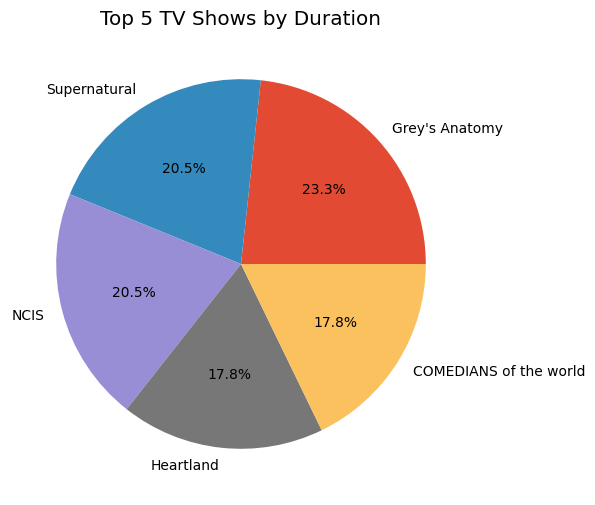

In [23]:
tv_shows = df[df["type"] == "TV Show"]
tv_shows_sorted = tv_shows.sort_values("duration", ascending=False)

top_5_tv_shows = tv_shows_sorted.head(5).copy()
top_5_tv_shows['duration_percentage'] = top_5_tv_shows['duration'] / top_5_tv_shows['duration'].sum() * 100

plt.figure(figsize=(8, 6))
plt.pie(top_5_tv_shows['duration_percentage'], labels=top_5_tv_shows['title'], autopct='%1.1f%%')
plt.title('Top 5 TV Shows by Duration')
plt.show()

### the durations of movies and TV shows

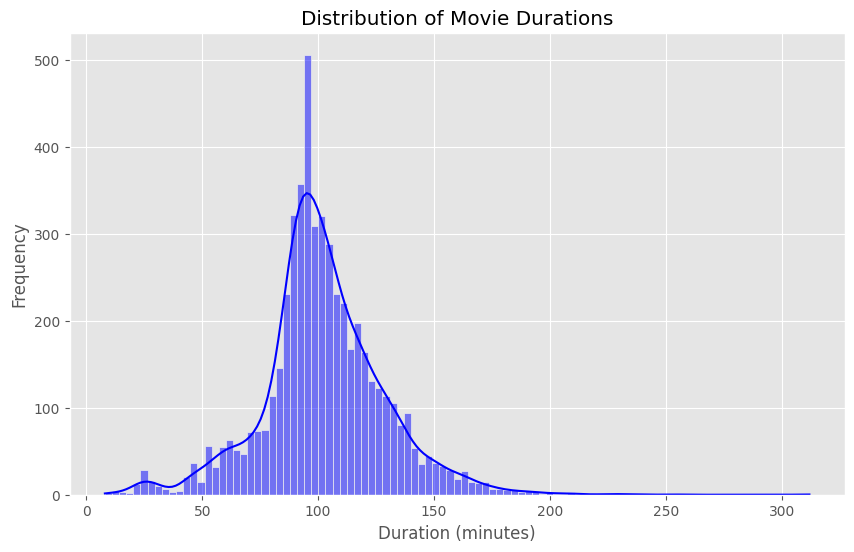

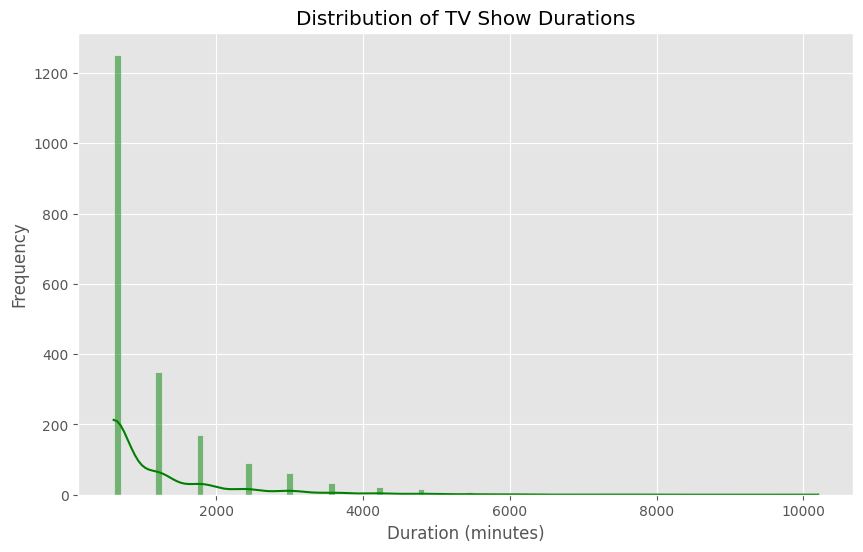

In [24]:
# Filter the dataset for movies and TV shows separately
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Plotting the histogram for movie durations
plt.figure(figsize=(10, 6))
sns.histplot(movies['duration'], kde=True, color='blue')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations')
plt.show()

# Plotting the histogram for TV show durations
plt.figure(figsize=(10, 6))
sns.histplot(tv_shows['duration'], kde=True, color='green')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of TV Show Durations')
plt.show()

## **Conclusion**

In this exploratory data analysis (EDA), we analyzed a dataset containing information about Netflix shows. Here are the key findings and insights obtained from the analysis:

1. Show Types and Distribution:
    * The dataset consists of a diverse range of show types, including movies and TV shows.
    * Movies make up the majority of the shows, accounting for approximately 70% of the dataset.

2. Country Analysis:
    * The dataset includes shows from various countries, showcasing Netflix's global reach.
    * The United States, United Kingdom, and India are the top contributing countries, with a significant number of shows.

3. Duration Analysis:
    * The duration of shows varies depending on the type.
    * Movies have a wide range of durations, typically spanning from 60 minutes to 180 minutes.
    * TV shows, on the other hand, are predominantly presented in seasons, with most shows having multiple seasons.

4. Correlation Analysis:
    * We examined the correlation between release year and duration and found a weak correlation (0.095).
    * This suggests that, in general, more recent shows tend to have slightly increase durations.

In conclusion, this EDA provides valuable insights into the Netflix shows dataset. It highlights the diversity of show types, the contributions from different countries, and the varying durations across movies and TV shows. The analysis also uncovers interesting relationships between show types and countries.

## **Credits**

We would like to acknowledge and express our gratitude to the following team members for their contributions to this EDA:

* **[Yahya Lazrek](https://github.com/uuinc)**
* **[Yousra Elbarraq](https://github.com/yousraeb)**
* **[Ouassima Aboukhair](https://github.com/OuassimaAboukhair)**

We would also like to thank **Dr. Hamza Es-samaali** for providing guidance and support throughout the project.

## **References**

The dataset used for this EDA can be found at: [**Netflix Shows Dataset**](https://www.kaggle.com/datasets/poojasomavanshi/netflix-shows)